In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

## Load Data

In [4]:
# parse_dates는 해당 column의 type을 datetime으로 만들어 줌
train = pd.read_csv('/content/drive/MyDrive/data/kaggle/bike-sharing-demand/train.csv', parse_dates=['datetime'])
test = pd.read_csv('/content/drive/MyDrive/data/kaggle/bike-sharing-demand/test.csv', parse_dates=['datetime'])
submission = pd.read_csv('/content/drive/MyDrive/data/kaggle/bike-sharing-demand/sampleSubmission.csv', parse_dates=['datetime'])

In [5]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [6]:
test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [7]:
submission.head(3)

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0


In [8]:
print(train.shape, test.shape)
print("훈련 데이터")
print(train.dtypes)
print("테스트 데이터")
print(test.dtypes)

(10886, 12) (6493, 9)
훈련 데이터
datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object
테스트 데이터
datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
dtype: object


# 중복, 결측, datetime 

## 중복 체크

In [10]:
sum(train.duplicated()), sum(test.duplicated())

(0, 0)

## null

In [12]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [13]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

## datetime

In [14]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [15]:
train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


# 시각화

## 년, 월, 일, 시간, 분, 초에 따른 대여량 평균치

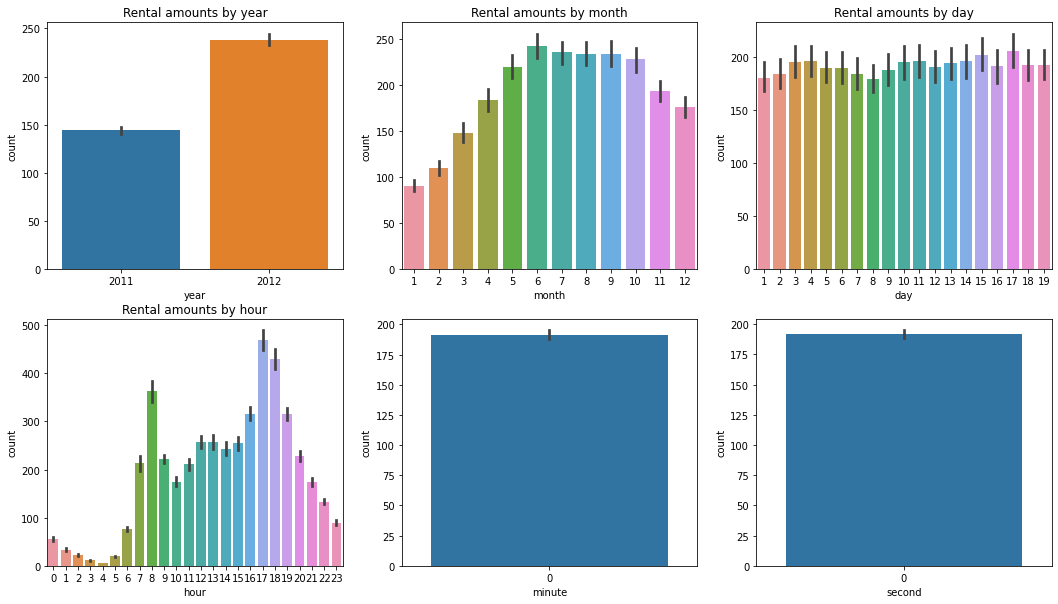

In [21]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 10)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.barplot(data=train, x="day", y="count", ax=ax3)
sns.barplot(data=train, x="hour", y="count", ax=ax4)
sns.barplot(data=train, x="minute", y="count", ax=ax5)
sns.barplot(data=train, x="second", y="count", ax=ax6)

ax1.set(title="Rental amounts by year")
ax2.set(title="Rental amounts by month")
ax3.set(title="Rental amounts by day")
ax4.set(title="Rental amounts by hour");

- 연별) 2011년보다 2012년 대여량이 많아짐
- 월별) 월별 대여량은 6월이 가장 많고, 주로 따뜻한 계절(5월~10월)에 대여량이 많음
- 일별) 일별 대여량에는 뚜렷한 차이가 없음, 그리고 train data에는 1\~19일만 있고, test data에 20일\~월말까지 있으므로 day를 feature로 사용할 수 없음
- 시간별) 출퇴근 시간인 8시, 17~18시에 대여량이 가장 많음
- 분, 초별) 분과 초는 모두 0으로 되어있어서 활용할 수 없음

## 시즌별, 시간별, 근무일/휴무일에 따른 대여량 평균치

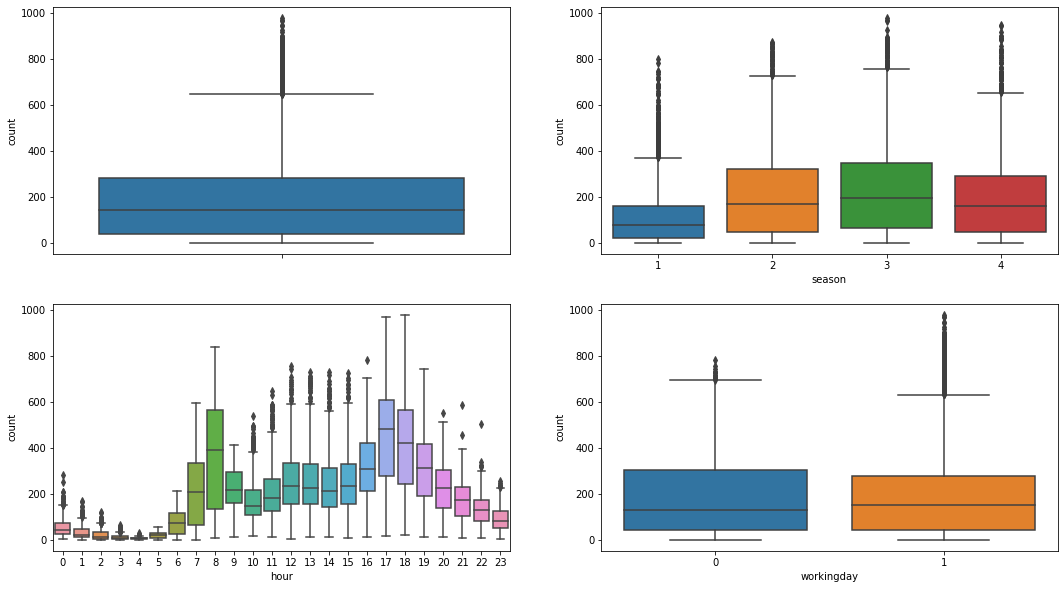

In [22]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18, 10)

sns.boxplot(data=train, y='count', ax=ax1)
sns.boxplot(data=train, x='season', y='count', ax=ax2)
sns.boxplot(data=train, x='hour', y='count', ax=ax3)
sns.boxplot(data=train, x='workingday', y='count', ax=ax4)

- season1\~4가 봄, 여름, 가을, 겨울이 아니라 1\~3월, 4\~6월, 7\~9월, 10\~12월임. 따라서 봄, 여름, 가을, 겨울보다는 1사분기, 2사분기, 3사분기, 4사부기로 보는 게 맞음. season별로는 3사분기에 가장 많은 대여량을 기록함.
- 시간대별로는 위에서 봤던 것처럼 출퇴근 시간이 가장 많음.

## datetime을 기반으로 요일 추출

In [23]:
# The day of week with Monday=0, Sunday=6
train['dayofweek'] = train['datetime'].dt.dayofweek
train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5


In [24]:
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

- 월,화,수,목,금,토,일 거의 비슷하게 분포되어 있음

## 시간대별 자전거 대여량 (by 근무일 유무, 요일, 시즌, 날씨)

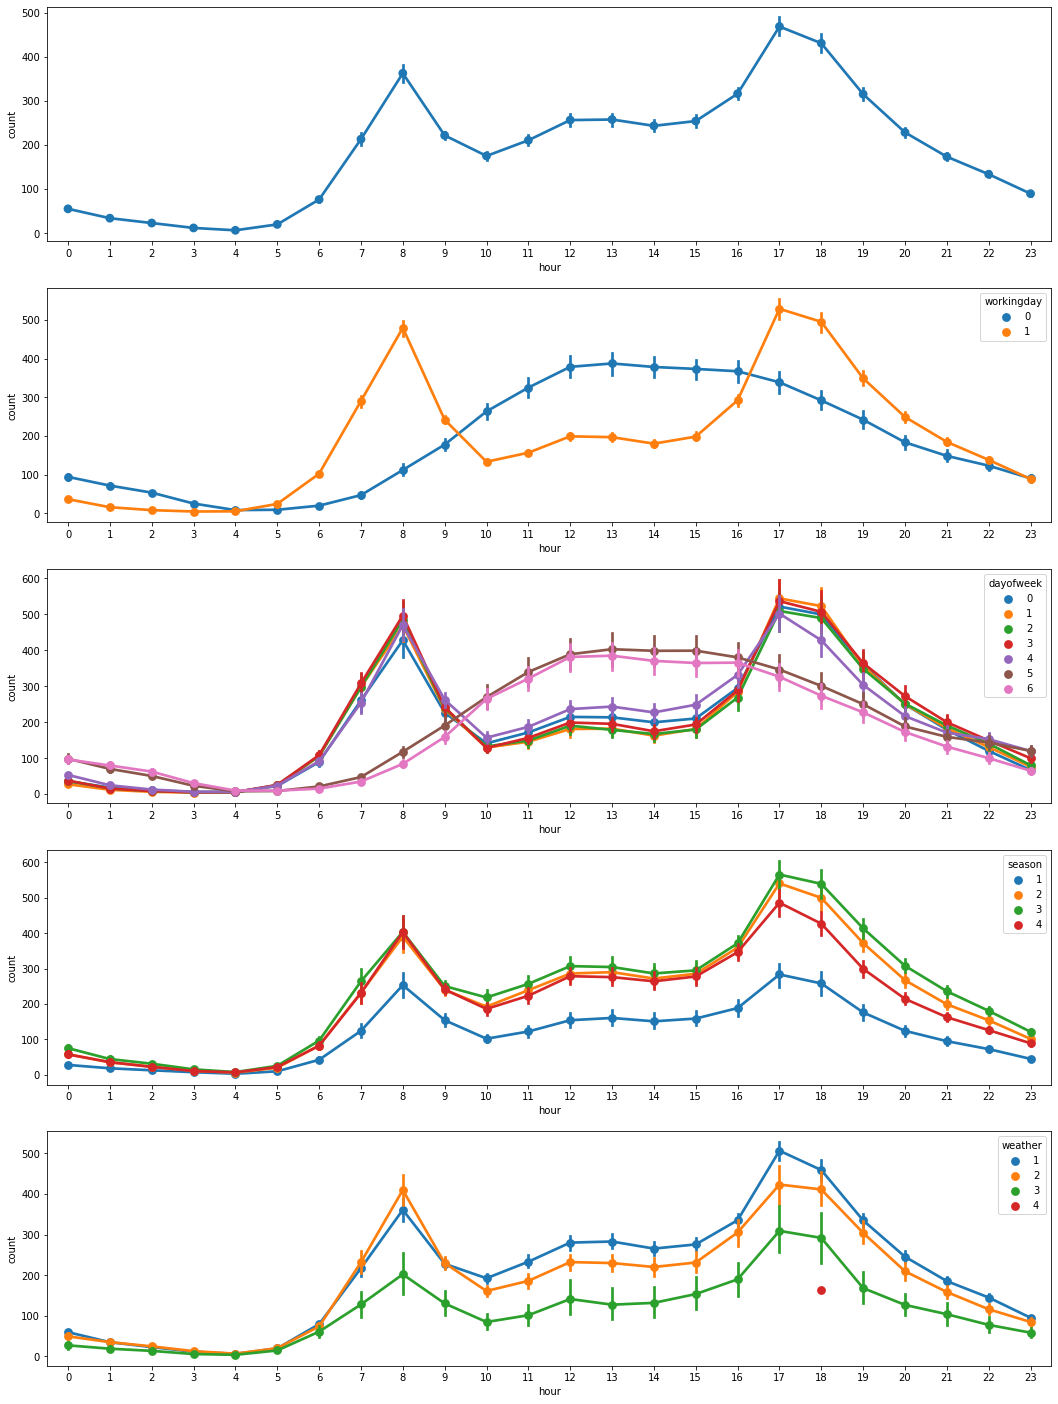

In [25]:
fig,(ax1, ax2, ax3, ax4, ax5)= plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x='hour', y='count', ax=ax1)
sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=ax2)
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek', ax=ax3)
sns.pointplot(data=train, x='hour', y='count', hue='season', ax=ax4)
sns.pointplot(data=train, x='hour', y='count', hue='weather', ax=ax5);

- 전체적으로 볼 때 출퇴근 시간에 자전거 대여량이 많음
- 근무일과 휴무일로 나누어보면 근무일에는 출퇴근 시간에 대여랑이 많고, 휴무일에는 낮시간에 대여량이 많음
- 요일로 나누어보면 월\~금은 출퇴근 시간에 대여량이 많고, 토,일은 낮시간에 대여량이 많음
- 시즌별로 보면 1\~3월에 대여량이 가장 적고, 7\~9월에 대여량이 가장 많음
- 날씨별로 보면 날씨가 좋을 수록 대여량이 많고, 비가 많이 올 때는 대여량의 거의 없음

## faeture간 상관관계

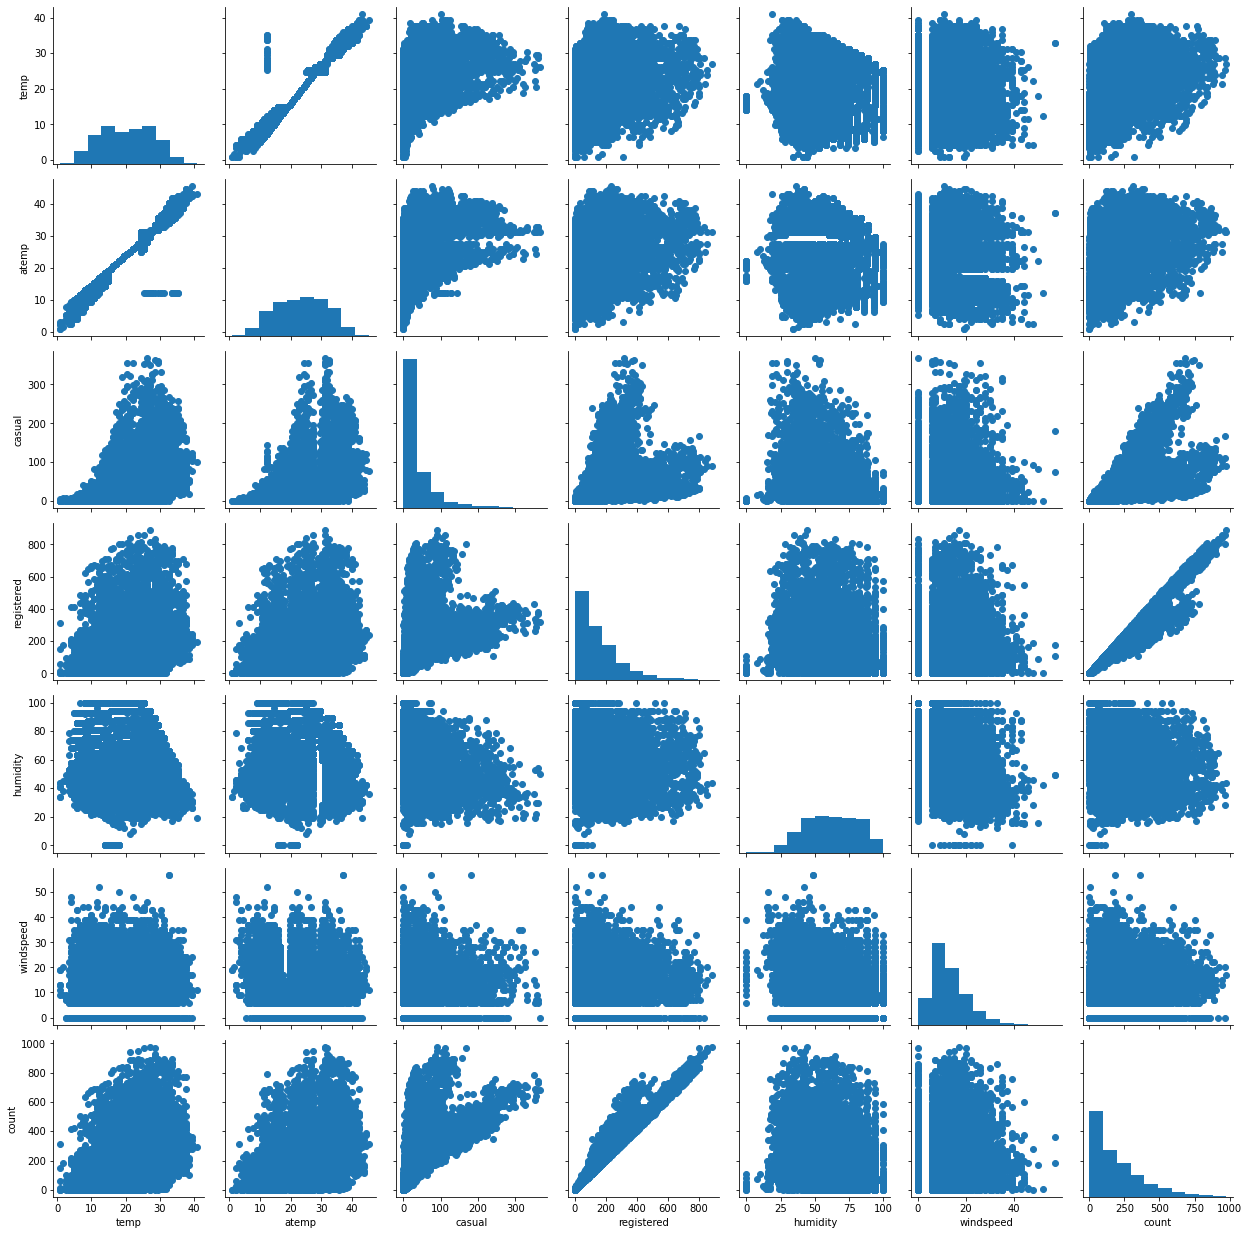

In [26]:
g = sns.PairGrid(data=df_train, vars=['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

In [27]:
corr_matrix = train[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']]
corr_matrix = corr_matrix.corr()
corr_matrix

,temp,atemp,casual,registered,humidity,windspeed,count
temp,1.000000,0.984948,0.467097,0.318571,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,0.462067,0.314635,-0.043536,-0.057473,0.389784
casual,0.467097,0.462067,1.000000,0.497250,-0.348187,0.092276,0.690414
registered,0.318571,0.314635,0.497250,1.000000,-0.265458,0.091052,0.970948
humidity,-0.064949,-0.043536,-0.348187,-0.265458,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,0.092276,0.091052,-0.318607,1.000000,0.101369
count,0.394454,0.389784,0.690414,0.970948,-0.317371,0.101369,1.000000


In [28]:
mask = np.array(corr_matrix)
print(mask)
print(np.tril_indices_from(mask))
mask[np.tril_indices_from(mask)] = False
mask

[[ 1.          0.98494811  0.46709706  0.31857128 -0.06494877 -0.01785201
   0.39445364]
 [ 0.98494811  1.          0.46206654  0.31463539 -0.04353571 -0.057473
   0.38978444]
 [ 0.46709706  0.46206654  1.          0.49724969 -0.3481869   0.09227619
   0.69041357]
 [ 0.31857128  0.31463539  0.49724969  1.         -0.26545787  0.09105166
   0.97094811]
 [-0.06494877 -0.04353571 -0.3481869  -0.26545787  1.         -0.31860699
  -0.31737148]
 [-0.01785201 -0.057473    0.09227619  0.09105166 -0.31860699  1.
   0.10136947]
 [ 0.39445364  0.38978444  0.69041357  0.97094811 -0.31737148  0.10136947
   1.        ]]
(array([0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6,
       6, 6, 6, 6, 6, 6]), array([0, 0, 1, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 0,
       1, 2, 3, 4, 5, 6]))


array([[ 0.        ,  0.98494811,  0.46709706,  0.31857128, -0.06494877,
        -0.01785201,  0.39445364],
       [ 0.        ,  0.        ,  0.46206654,  0.31463539, -0.04353571,
        -0.057473  ,  0.38978444],
       [ 0.        ,  0.        ,  0.        ,  0.49724969, -0.3481869 ,
         0.09227619,  0.69041357],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.26545787,
         0.09105166,  0.97094811],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.31860699, -0.31737148],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.10136947],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

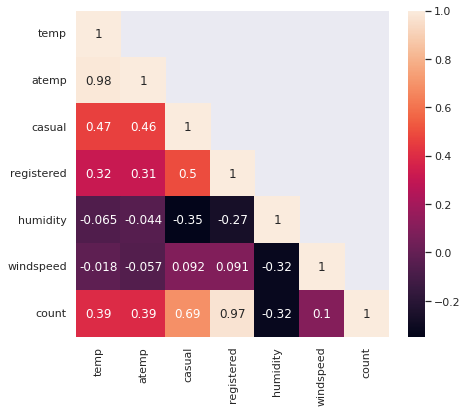

In [29]:
sns.set(rc={'figure.figsize':(7,6)})
sns.heatmap(corr_matrix, mask=mask, annot=True);

- 온도, 습도, 풍속은 상관관계가 거의 없음
- 대여량과 가장 상관관계가 높은 것은 registered지만 테스트 데이터에는 없으므로 사용할 수 없음
- 온도와 체감온도는 당연히 상관관계가 높지만 큰 의미가 있지는 않음

## 기온, 풍속, 습도 시각화


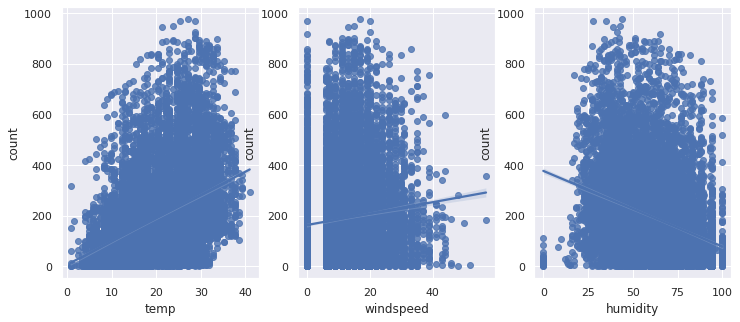

In [30]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="temp", y="count", data=train,ax=ax1)
sns.regplot(x="windspeed", y="count", data=train,ax=ax2)
sns.regplot(x="humidity", y="count", data=train,ax=ax3);

- 풍속이 0인 데이터가 많은 것은 관측치가 없기 때문인 것으로 사료됨

## 연도별, 월별 자전거 대여량

In [31]:
def concat_year_month(datetime):
    return '{0}-{1}'.format(datetime.year, datetime.month)

train['year_month'] = train['datetime'].apply(concat_year_month)

train[['datetime', 'year_month']].head()

,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


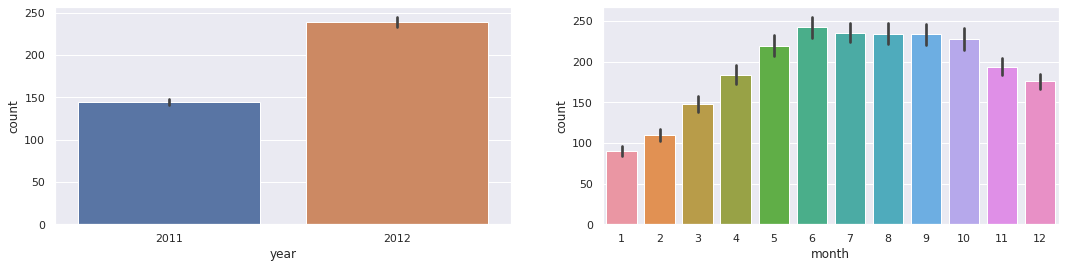

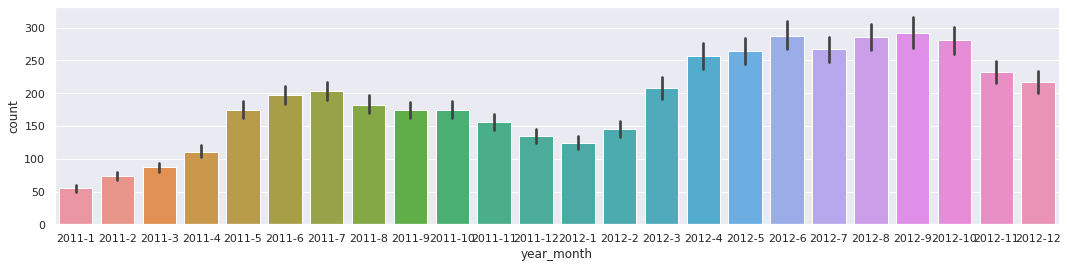

In [32]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18,4)
sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,4)
sns.barplot(data=train, x='year_month', y='count', ax=ax3);

- 2011년보다 2012년의 대여량이 더 많음
- 주로 여름철 대여량이 많고, 그중 6월이 가장 많음
- 2011년과 2012년의 월별 대여량 양상은 비슷하나 2012년에 대여량이 더 많음

## 3시그마 초과하는 아웃라이어 제거

In [33]:
train_without_outliers = train[train['count'] - train['count'].mean() < 3*train['count'].std()]

print(train.shape)
print(train_without_outliers.shape)

(10886, 20)
(10739, 20)


## 대여량 로그화

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


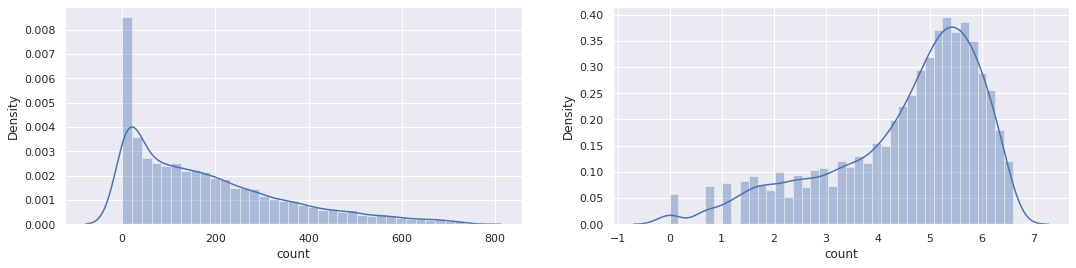

In [34]:
figure, axes = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,4)

sns.distplot(train_without_outliers['count'], ax=axes[0]);
sns.distplot(np.log(train_without_outliers['count']), ax=axes[1]);